# Plot the Energy Summary
The "energy summary" file contains the energies, sizes, source, and evaluation times of all clusters generated by our team.
Here, we use it to study how we're doing

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Load in the summary
It's a big CSV file and also contains the "graph_hash" that we do not need for this analysis.
So, we don't read all of the columns.

In [2]:
data = pd.read_csv('data/energy_summary.csv', usecols=['n_waters', 'energy', 'create_date', 'source'])
print(f'Loaded {len(data)} records')

Loaded 4585881 records


Compute the energy per water

In [3]:
data['energy_per_water'] = data['energy'] / data['n_waters']

## Plot the best clusters found
Let's compare the "best over time" from the WDBase and our later analyses

In [4]:
%%time
best_wdbase = data.query('source=="wdbase"').groupby('n_waters')['energy_per_water'].min()
best_current = data.groupby('n_waters')['energy_per_water'].min()

CPU times: user 270 ms, sys: 81.1 ms, total: 351 ms
Wall time: 338 ms


Text(0, 0.5, 'Energy Water (kcal/H$_2$O)')

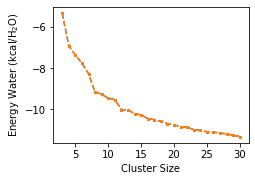

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.plot(best_wdbase.index, best_wdbase, '--o', ms=2, label='WDBase')
ax.plot(best_current.index, best_current, '--s', ms=2, label='Current')

ax.set_xlabel('Cluster Size')
ax.set_ylabel('Energy Water (kcal/H$_2$O)')

No noticable improvements yet or an indicatio that we'd extend above the maximum

## Compare Clusters from Different Sources
We have clusters form a few different source: Reinforcement Learning, Random Search, and Basin Hopping (from WDBase). 

Let's see how they compare for certain cluster sizes.

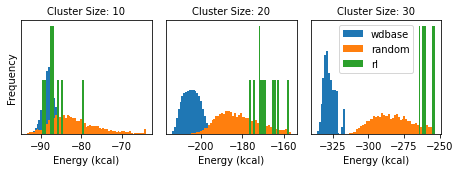

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5))

sizes = [10, 20, 30]

for ax, size in zip(axs, sizes):
    all_clusters = data.query(f'n_waters=={size}')
    min_, max_ = np.percentile(all_clusters['energy'], [0.1, 99.9])
    bins = np.linspace(min_, max_, 64)
    for source in ['wdbase', 'random', 'rl']:
        my_clusters = all_clusters.query(f'source=="{source}"')
        ax.hist(my_clusters['energy'], density=True, bins=bins, label=source)
        
    ax.set_xlabel('Energy (kcal)')
    ax.set_yticks([])
    ax.set_title(f'Cluster Size: {size}', fontsize=10)
        
axs[2].legend()
axs[0].set_ylabel('Frequency')

fig.tight_layout()

At present, RL does better compared to random for small clusters and is much worse than WDBase in many cases